In [41]:
# Imports
import pandas as pd
import plotly.express as px
from prettytable import PrettyTable
import plotly.graph_objects as go
import numpy as np
import random
import csv
import os
import json
import altair as alt
from tqdm import tqdm
import numpy as np
import seaborn as sns

In [42]:
WD = os.path.join("E:\\", "BUSTEDS-MH")

DATA = os.path.join(WD, "tables", "Table_13Datasets_BUSTEDS_and_BUSTEDS-MH.csv")

In [43]:
print("Reading:", DATA)
df = pd.read_csv(DATA)
df = df.reset_index(drop=True)
df.index += 1
df

Reading: E:\BUSTEDS-MH\tables\Table_13Datasets_BUSTEDS_and_BUSTEDS-MH.csv


,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,TH_Rate,TH_Rate_SI,BUSTEDS-MH_num_ER_Sites,BUSTEDS-MH_ER_Sites,ΔcAIC,RelativeSupport,num_ER_Sites,BUSTEDS_num_ER_Sites,BUSTEDS_ER_Sites,ER_Sites_Intersection
1,COXI,BUSTEDS,21,510,5.000000e-01,24288.711706,0.0000,0.5308,0.0127,0.4597,...,NaN,NaN,NaN,NaN,6.813631,3.314659e-02,0.0,0.0,NaN,NaN
2,COXI,BUSTEDS-MH,21,510,5.000000e-01,24295.525337,0.0000,0.0094,0.0056,0.9793,...,0.000000,4.350649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ENCenv,BUSTEDS,23,500,5.000000e-01,13699.078482,0.0502,1.0000,0.1152,0.0000,...,NaN,NaN,NaN,NaN,6.031367,4.901231e-02,NaN,NaN,NaN,NaN
4,ENCenv,BUSTEDS-MH,23,500,5.000000e-01,13705.109850,0.0492,0.9460,0.0608,0.0540,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HIV_RT,BUSTEDS,476,335,7.174705e-11,52048.518414,0.0000,0.0104,0.1524,0.9886,...,NaN,NaN,NaN,NaN,2.330108,3.119058e-01,22.0,22.0,36|39|48|64|65|69|72|75|103|104|122|138|151|16...,75|151|64|162|188|228|48|245|215|122|69|181
6,HIV_RT,BUSTEDS-MH,476,335,1.197611e-03,52050.848522,0.0000,0.0059,0.1512,0.9934,...,0.000000,0.000000,12.0,48|64|69|75|122|151|162|181|188|215|228|245,NaN,NaN,NaN,NaN,NaN,NaN
7,HIVvif,BUSTEDS,29,192,2.270883e-02,6911.649070,0.0000,0.0496,0.7591,0.9499,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,6,NaN
8,HIVvif,BUSTEDS-MH,29,192,5.000000e-01,6911.008313,0.7076,0.5220,0.7266,0.4780,...,0.163413,0.000000,NaN,NaN,0.640757,7.258741e-01,NaN,NaN,NaN,NaN
9,HepatitisD,BUSTEDS,33,196,1.118888e-08,10424.225296,0.0000,0.5131,0.6689,0.4678,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,23.0,6|9|13|17|24|28|31|35|38|75|85|90|117|122|140|...,117|140|90|122|183|13|24
10,HepatitisD,BUSTEDS-MH,33,196,3.227677e-02,10418.263458,0.0000,0.4981,0.6771,0.4864,...,0.000000,0.000000,7.0,13|24|90|117|122|140|183,5.961838,5.074618e-02,NaN,NaN,NaN,NaN


In [60]:
# simple counts

num_genes = df[df["Method"] == "BUSTEDS-MH"]
delta_cAIC = df[df["ΔcAIC"] > 5]
BUSTEDS_preferred = delta_cAIC[delta_cAIC["Method"] == "BUSTEDS"]
BUSTEDSMH_preferred = delta_cAIC[delta_cAIC["Method"] == "BUSTEDS-MH"]

print("# Number of genes:", num_genes.shape[0])

print("# Number of genes preferring BUSTEDS (by more than 5 delta cAIC):", BUSTEDS_preferred.shape[0])
print("# Number of genes preferring BUSTEDS-MH (by more than 5 delta cAIC):", BUSTEDSMH_preferred.shape[0])

# Number of genes: 13
# Number of genes preferring BUSTEDS (by more than 5 delta cAIC): 4
# Number of genes preferring BUSTEDS-MH (by more than 5 delta cAIC): 6


In [54]:
num_genes

,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,TH_Rate,TH_Rate_SI,BUSTEDS-MH_num_ER_Sites,BUSTEDS-MH_ER_Sites,ΔcAIC,RelativeSupport,num_ER_Sites,BUSTEDS_num_ER_Sites,BUSTEDS_ER_Sites,ER_Sites_Intersection
2,COXI,BUSTEDS-MH,21,510,0.500000,24295.525337,0.0000,0.0094,0.0056,0.9793,...,0.000000,4.350649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ENCenv,BUSTEDS-MH,23,500,0.500000,13705.109850,0.0492,0.9460,0.0608,0.0540,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,HIV_RT,BUSTEDS-MH,476,335,0.001198,52050.848522,0.0000,0.0059,0.1512,0.9934,...,0.000000,0.000000,12.0,48|64|69|75|122|151|162|181|188|215|228|245,NaN,NaN,NaN,NaN,NaN,NaN
8,HIVvif,BUSTEDS-MH,29,192,0.500000,6911.008313,0.7076,0.5220,0.7266,0.4780,...,0.163413,0.000000,NaN,NaN,0.640757,7.258741e-01,NaN,NaN,NaN,NaN
10,HepatitisD,BUSTEDS-MH,33,196,0.032277,10418.263458,0.0000,0.4981,0.6771,0.4864,...,0.000000,0.000000,7.0,13|24|90|117|122|140|183,5.961838,5.074618e-02,NaN,NaN,NaN,NaN
12,InfluenzaA,BUSTEDS-MH,349,329,0.500000,23230.106700,0.4224,0.0000,0.4395,1.0000,...,0.014894,0.000000,NaN,NaN,12.388686,2.040944e-03,NaN,NaN,NaN,NaN
14,adh,BUSTEDS-MH,23,254,0.019474,9359.172807,0.0347,0.6921,0.0466,0.2831,...,0.033881,3.375762,15.0,6|35|39|49|69|133|134|163|165|166|170|197|216|...,NaN,NaN,NaN,NaN,NaN,NaN
16,bglobin,BUSTEDS-MH,17,144,0.002195,7384.667182,0.0135,0.5805,0.2595,0.3893,...,0.000000,260.314688,15.0,3|8|10|11|21|42|48|50|54|74|110|114|116|124|133,30.923254,1.927972e-07,NaN,NaN,NaN,NaN
18,camelid,BUSTEDS-MH,212,96,0.005554,33668.363270,0.3492,0.5604,1.0000,0.3951,...,0.000000,0.000000,22.0,1|11|14|23|25|29|32|33|40|50|51|52|53|54|57|58...,26.241272,2.003458e-06,NaN,NaN,NaN,NaN
20,flavNS5,BUSTEDS-MH,18,342,0.500000,18488.626912,0.0162,1.0000,0.0187,0.0000,...,0.902814,2.386362,NaN,NaN,41.953286,7.761749e-10,NaN,NaN,NaN,NaN


In [44]:
df.columns

Index(['Gene', 'Method', 'Sequences', 'Codons', 'LRT p-value', 'cAIC', 'w1',
       'p1', 'w2', 'p2', 'w3', 'p3', 'SRV1', 'SRV_p1', 'SRV2', 'SRV_p2',
       'SRV3', 'SRV_p3', 'DH_Rate', 'TH_Rate', 'TH_Rate_SI',
       'BUSTEDS-MH_num_ER_Sites', 'BUSTEDS-MH_ER_Sites', 'ΔcAIC',
       'RelativeSupport', 'num_ER_Sites', 'BUSTEDS_num_ER_Sites',
       'BUSTEDS_ER_Sites', 'ER_Sites_Intersection'],
      dtype='object')

In [45]:
columns = ['Gene', 'Method', 'Sequences', 'Codons', 'LRT p-value', 'cAIC', 'w1',
       'p1', 'w2', 'p2', 'w3', 'p3', 'SRV1', 'SRV_p1', 'SRV2', 'SRV_p2',
       'SRV3', 'SRV_p3', 'DH_Rate', 'TH_Rate', 'TH_Rate_SI']

dfv = df[columns]
dfv = dfv.fillna("")
dfv = dfv.round(2)
dfv

,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,p3,SRV1,SRV_p1,SRV2,SRV_p2,SRV3,SRV_p3,DH_Rate,TH_Rate,TH_Rate_SI
1,COXI,BUSTEDS,21,510,0.50,24288.71,0.00,0.53,0.01,0.46,...,0.01,0.03,0.02,0.57,0.94,12.41,12.41,,,
2,COXI,BUSTEDS-MH,21,510,0.50,24295.53,0.00,0.01,0.01,0.98,...,0.01,0.04,0.02,0.63,0.95,12.67,12.67,0.0,0.0,4.350649
3,ENCenv,BUSTEDS,23,500,0.50,13699.08,0.05,1.00,0.12,0.00,...,0.00,0.39,0.29,1.13,0.68,4.55,4.55,,,
4,ENCenv,BUSTEDS-MH,23,500,0.50,13705.11,0.05,0.95,0.06,0.05,...,0.00,0.40,0.30,1.13,0.67,4.46,4.46,0.012858,0.0,0.0
5,HIV_RT,BUSTEDS,476,335,0.00,52048.52,0.00,0.01,0.15,0.99,...,0.00,0.40,0.51,1.21,0.41,4.12,4.12,,,
6,HIV_RT,BUSTEDS-MH,476,335,0.00,52050.85,0.00,0.01,0.15,0.99,...,0.00,0.40,0.51,1.20,0.41,4.01,4.01,0.039494,0.0,0.0
7,HIVvif,BUSTEDS,29,192,0.02,6911.65,0.00,0.05,0.76,0.95,...,0.00,0.29,0.54,1.16,0.33,3.57,3.57,,,
8,HIVvif,BUSTEDS-MH,29,192,0.50,6911.01,0.71,0.52,0.73,0.48,...,0.00,0.30,0.54,1.15,0.32,3.50,3.50,0.003737,0.163413,0.0
9,HepatitisD,BUSTEDS,33,196,0.00,10424.23,0.00,0.51,0.67,0.47,...,0.02,0.04,0.21,0.76,0.60,2.78,2.78,,,
10,HepatitisD,BUSTEDS-MH,33,196,0.03,10418.26,0.00,0.50,0.68,0.49,...,0.02,0.06,0.24,0.81,0.57,2.75,2.75,0.144653,0.0,0.0


In [46]:
import dataframe_image as dfi

In [47]:
dfi.export(dfv,"13Datasets_Table.png")

## Carryover viz's

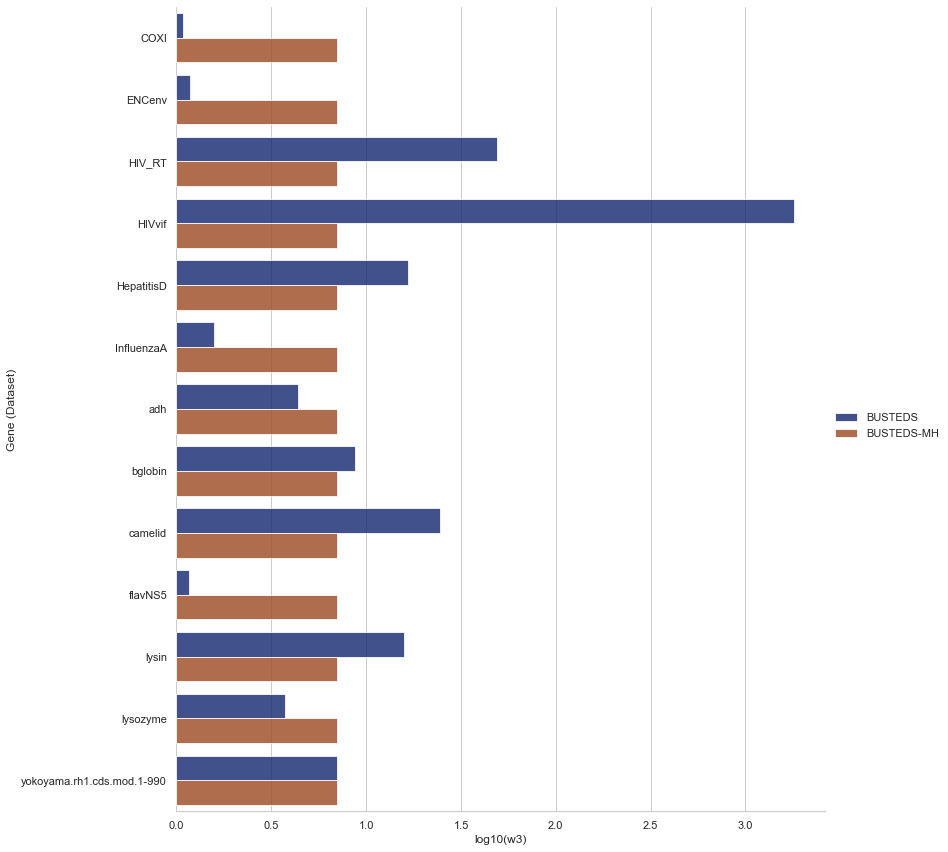

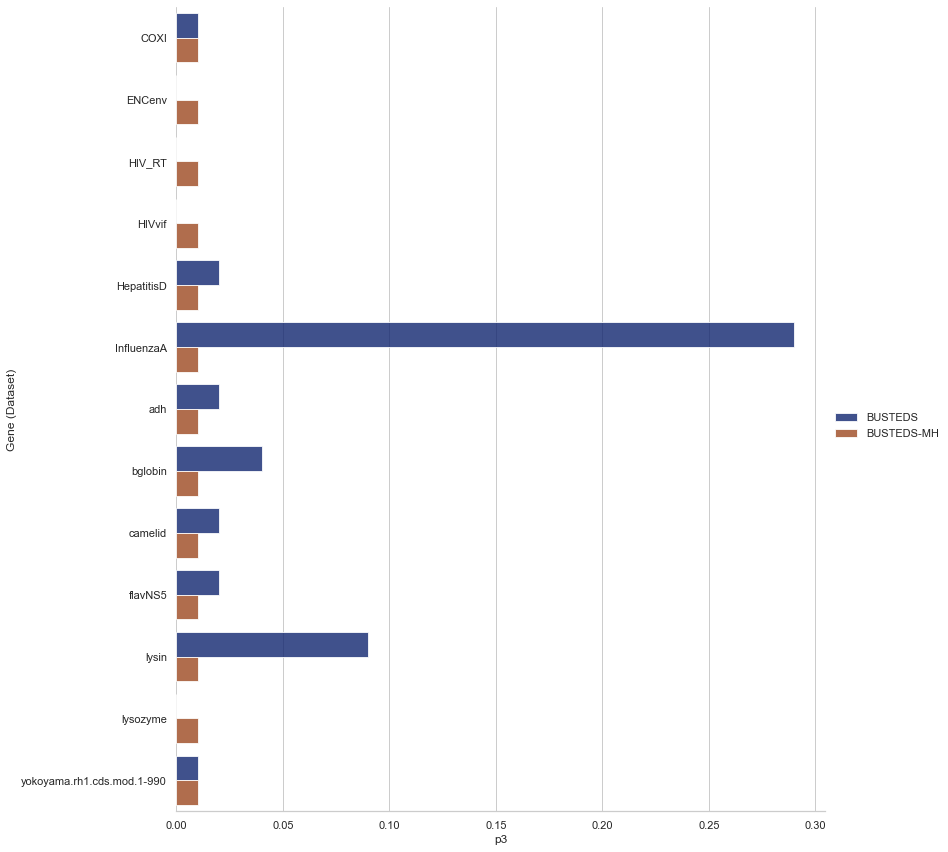

In [39]:
sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
#sns.set_theme(style="white")

#penguins = sns.load_dataset("penguins")
dfv["log10(w3)"] = np.log10(dfv["w3"])

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=dfv, kind="bar",
    x="log10(w3)", y="Gene", hue="Method",
    ci="sd", palette="dark", alpha=.8, height=12
)
g.despine(left=True)
g.set_axis_labels("log10(w3)", "Gene (Dataset)")
g.legend.set_title("")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=dfv, kind="bar",
    x="p3", y="Gene", hue="Method",
    ci="sd", palette="dark", alpha=.8, height=12
)
g.despine(left=True)
g.set_axis_labels("p3", "Gene (Dataset)")
g.legend.set_title("")

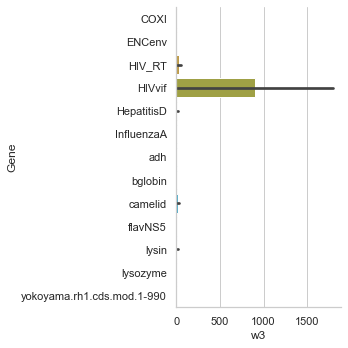

In [40]:
sns.catplot(y = "Gene",       # x variable name
            x = "w3",       # y variable name
            data = df,     # dataframe to plot
            kind = "bar")